In [50]:
import numpy
import matplotlib.pyplot as plt
from scipy import optimize, stats
import pandas
import sys
sys.path.insert(0,'/home/leo/Documents/cosmic_ray_generator/')
import functions

In [2]:
def inp():
    a=[[],[]]
    p=input('p')
    I=input('intensity')
    for i in p.split(' '):
        a[0].append(float(i))
    for i in I.split(' '):
        a[1].append(float(i))
    return a

In [3]:
def plot(data):
    x=numpy.array(data[0])
    y=numpy.array(data[1])
    return [x,y]

In [4]:
tsuji1=inp()
tsuji2=inp()
tsuji3=inp()

In [5]:
def test_distr(x,params):
    a,b=params[0],params[1]
    return a*(numpy.cos(numpy.deg2rad(x))**b)

In [6]:
def res(params,x,y):
    return y-test_distr(x,params)

In [7]:
def fit(data):
    popt=optimize.leastsq(res,x0=numpy.array([1,2]),args=(data[0],data[1]))
    print(popt)
    return(popt[0])

In [8]:
def exp(a,x,y,E):
    return y-a*functions.theory_supressed(E_mu=E,theta=numpy.deg2rad(x))

In [9]:
def expfit(data,E):
    popt=optimize.least_squares(exp,x0=[1.],args=[data[0],data[1],E])
    return popt['x'][0]

In [10]:
def expcos(a,x,y):
    return y-a*numpy.cos(numpy.deg2rad(x))**2

In [11]:
def cosfit(data):
    popt=optimize.least_squares(expcos,x0=[1.],args=[data[0],data[1]])
    return popt['x'][0]

In [12]:
fit_res=fit(tsuji1)
fit2=fit(tsuji2)
fit3=fit(tsuji3)

(array([8.84181871e-05, 9.83116111e-01]), 1)
(array([2.08490974e-05, 6.72629633e-01]), 1)
(array([3.04784394e-06, 5.13758868e-01]), 1)


In [13]:
cosfit(tsuji1)

0.00010212550800126063

In [21]:
with open("gen_data_angle_actual.npy",'rb') as file:
    c=numpy.load(file)
c=[[c[i][0] for i in range(len(c))],[c[i][1] for i in range(len(c))]]

In [24]:
tsuji2

[[0.0,
  8.0,
  10.0,
  12.0,
  14.0,
  16.0,
  18.0,
  20.0,
  22.0,
  24.0,
  26.0,
  28.0,
  30.0,
  32.0,
  34.0,
  36.0,
  38.0,
  40.0,
  42.0,
  44.0,
  46.0,
  48.0,
  50.0,
  52.0,
  54.0,
  56.0,
  58.0,
  60.0,
  62.0,
  64.0,
  66.0,
  68.0,
  70.0,
  72.0,
  74.0,
  76.0,
  78.0,
  80.0],
 [2.04e-05,
  2e-05,
  1.94e-05,
  2.02e-05,
  1.88e-05,
  2.08e-05,
  1.91e-05,
  2.03e-05,
  1.92e-05,
  1.91e-05,
  1.88e-05,
  1.89e-05,
  2.23e-05,
  1.94e-05,
  2.01e-05,
  1.71e-05,
  1.54e-05,
  1.67e-05,
  1.76e-05,
  1.68e-05,
  1.93e-05,
  1.81e-05,
  1.66e-05,
  1.57e-05,
  1.37e-05,
  1.38e-05,
  1.54e-05,
  1.19e-05,
  1.21e-05,
  1.2e-05,
  1.2e-05,
  1.27e-05,
  1.02e-05,
  9.97e-06,
  7.79e-06,
  7.01e-06,
  4.8e-06,
  4.99e-06]]

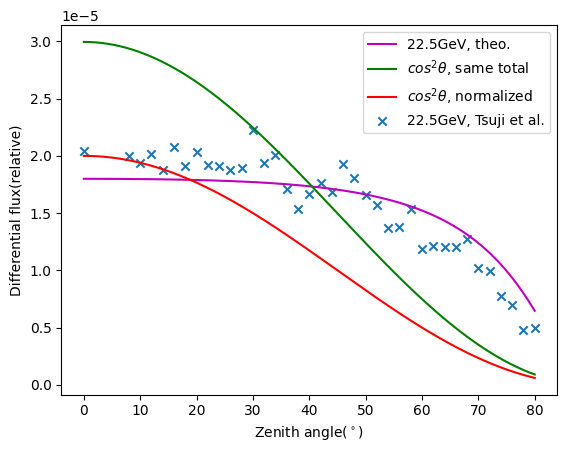

In [80]:
x=numpy.linspace(0,80,100000)
c2=[x,numpy.cos(numpy.deg2rad(x))**2]
xfit=numpy.array(functions.theory_supressed(E_mu=22.5, theta=numpy.deg2rad(tsuji2[0])))
# plt.plot(x, expfit(tsuji1,12.5)*functions.theory_supressed(E_mu=12.5, theta=numpy.deg2rad(x)), label='12.5GeV, theo.')
plt.plot(x, (numpy.sum(tsuji2[1])/numpy.sum(xfit))*functions.theory_supressed(E_mu=22.5, theta=numpy.deg2rad(x)), label='22.5GeV, theo.', color='m')
# plt.plot(x, expfit(tsuji3,45)*functions.theory_supressed(E_mu=45, theta=numpy.deg2rad(x)), label='45GeV, theo.')
# plt.plot(x, cosfit(tsuji1)*(numpy.cos(numpy.deg2rad(x))**2),label='cos-squared')
# plt.scatter(tsuji1[0],numpy.array(tsuji1[1]), label='12.5GeV', marker='x')
# plt.scatter(c[1], (1/expfit([c[1],c[0]],22.5))*numpy.array(c[0]), marker='x',label='generator data')
xfit=numpy.array(numpy.cos(numpy.deg2rad(tsuji2[0]))**2)
plt.plot(x, (numpy.sum(tsuji2[1])/numpy.sum(xfit))*numpy.array(c2[1]), label='$cos^2\\theta$, same total', color='g')
plt.plot(x, 2*10**-5*numpy.array(c2[1]), label='$cos^2\\theta$, normalized', color='r')
plt.scatter(tsuji2[0],numpy.array(tsuji2[1]), label='22.5GeV, Tsuji et al.', marker='x')
# plt.scatter(tsuji3[0],numpy.array(tsuji3[1]), label='45.0GeV', marker='x')
plt.xlabel('Zenith angle($^\circ$)')
plt.ylabel('Differential flux(relative)')
plt.legend()

In [70]:
numpy.sum(xfit)/numpy.sum(tsuji2[1])

33386.744056359916

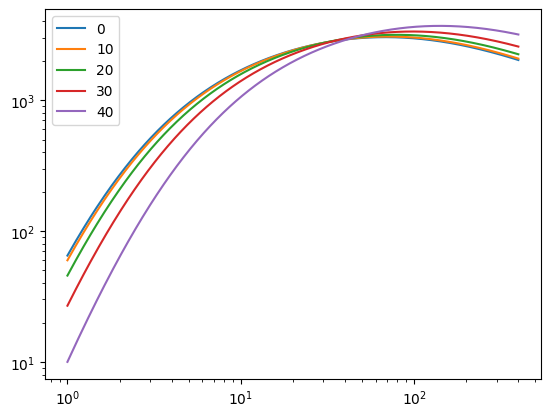

In [40]:
xe=numpy.linspace(1,400,10000)
for i in range(0,5):
    y=functions.theory_supressed(theta=numpy.deg2rad(15*i),E_mu=xe)
    plt.plot(xe,y*xe**3, label=10*i)
plt.legend()
plt.yscale('log')
plt.xscale('log')

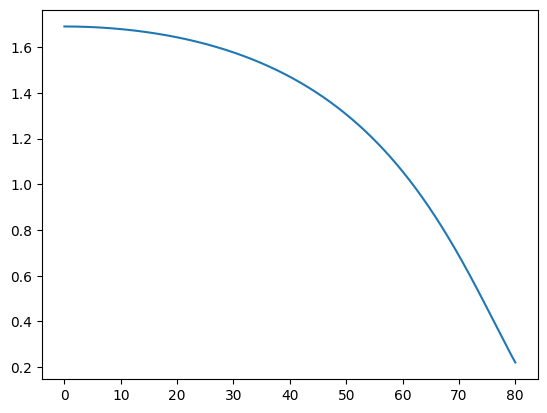

In [47]:
plt.plot(x,functions.theory_supressed(E_mu=10,theta=numpy.deg2rad(x)))